## Discounted reward

goal과 맞닿아있는 방향에 reward 1을 얻게되고(reward + max Q(s,a): 다음상태의 Q테이블의 최댓값 = reward:1 + discounted_rate * max Q(s,a):0)  

S10은 S14에 갈수있는 아랫쪽 방향에 reward가 주어지는데, 이때 S14의 reward가 미래의 reward이기때문에 discount한다. discount_rate가 0.9인 경우0.9 * S14의 최댓값(1) = 0.9가 S10의 아랫쪽 reward가 된다 

→ and so on..  

cf. 식에서 r은 이 그 게임이 끝나고 나서 얻을 수 있는 reward를 말한다.


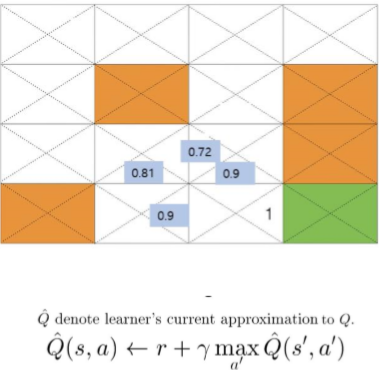

In [9]:
Image ("C:/Users/user/Pictures/discountedreward.png")  

Success rate: 0.016
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


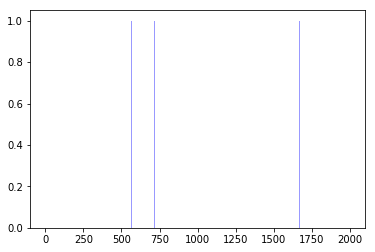

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random

#최대값이 모두 같을 때 random하게 return하도록 작성한 코드.
def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}
)

env = gym.make('FrozenLake-v3')

# Q를 모두 0으로 초기화.  Q[16,4]
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):  # 여러번 반복 학습
    state = env.reset()    # 환경 reset 후, 첫번째 상태 얻음 
    rAll = 0
    done = False
 
    e = 1. / ((i // 100) + 1)  # 초반에는 random (모험), 진행될수록 아는길로 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e-greedy 
        # 현재 state의 Q중 최대 reward를 얻을 수 있는 action을 구함. 
        # 단, 알려진 길로만 가지 않기 위해서 random 값이 e보다 적은 경우는 아무렇게나 action
        # 학습 후반부로 갈 수록 e의 값은 작아져, 정해질 길로 가게 됩니다.
       
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = rargmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step (action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state
    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()

